In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CoilData = pd.read_csv("CleanCoilData1.csv")
CoilData.columns

Index(['Unnamed: 0', 'coil', 'furnace Number', 'analyse', 'Hardness_1',
       'Hardness_2', 'Width', 'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness', 'Thickness profile',
       'c', 'mn', 'si', 'nb', 'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va',
       'mo', 'constriction'],
      dtype='object')

In [2]:
#CoilData.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [3]:
#sns.pairplot(CoilData)
#plt.show()

In [4]:
#sns.pairplot(CoilData, hue="constriction")
#plt.show()

In [6]:
everything = ['furnace Number','Hardness_1', 'Hardness_2', 'Width', 'Temperature before finishing mill','Temperature after finishing mill', 'Thickness', 'c', 'mn', 'si', 'nb', 'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va', 'mo']
hand_picked = ['c','mn','p','s','al','ma','b','ti','va','mo']
hand_picked1 = ['Width','Thickness']
X = CoilData[everything]
y = CoilData['constriction']

In [7]:
y.value_counts()

0    51602
1     3725
Name: constriction, dtype: int64

C:\Users\Mahboubeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


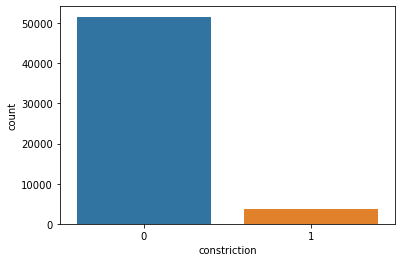

In [8]:
sns.countplot(y)
plt.show()

In [9]:
#UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [10]:
#Split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [11]:
#Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# SVM model

from sklearn.svm import SVC
svc = SVC(random_state=2020)
svc.fit(X_train, y_train)

SVC(random_state=2020)

In [13]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print("SVM Accuracy = " ,  metrics.accuracy_score(y_test, y_pred))

SVM Accuracy =  0.8031319910514542


In [14]:
# Decision Tree model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2020)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2020)

In [15]:
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy = " ,metrics.accuracy_score(y_test, y_pred))

Decision Tree Accuracy =  0.7642058165548098


In [16]:
#RandomForest model

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=30)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=30)

In [17]:
y_pred = RF.predict(X_test)
print("RandomForest  Accuracy = " ,metrics.accuracy_score(y_test, y_pred))

RandomForest  Accuracy =  0.8161073825503355


In [18]:
# Evaluate your model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1094
           1       0.81      0.84      0.82      1141

    accuracy                           0.82      2235
   macro avg       0.82      0.82      0.82      2235
weighted avg       0.82      0.82      0.82      2235



Predicted,0,1
Actual,,
0,869,225
1,186,955


C:\Users\Mahboubeh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


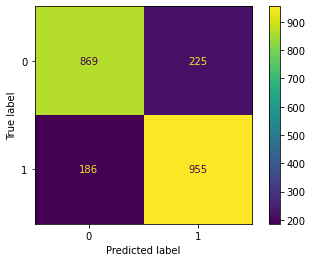

In [19]:
metrics.plot_confusion_matrix(RF, X_test, y_test)
plt.show()

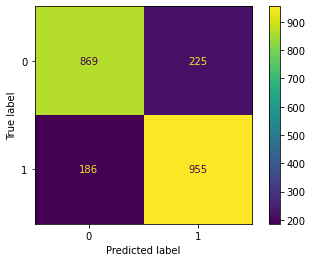

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
cmd=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
cmd.plot()

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, X, y, cv=5) # cv is the number of folds (k)
print("Random Forest Cross-validation Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# It is always a good practice to show the mean AND the standard deviation of the model accuracy
print("Accuracy: {:.2f}% (+/- {:.2f})".format(scores.mean() * 100, scores.std() * 100))

Random Forest Cross-validation Scores: [0.92454365 0.92626062 0.93258021 0.93583371 0.93881609]
Mean: 0.9316068539671882
Standard Deviation: 0.005463659833565544
Accuracy: 93.16% (+/- 0.55)


In [33]:
#Feature Importance:
imp_rf = pd.DataFrame(zip(everything, RF.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()


,importance
feature,
Thickness,0.163957
Width,0.082794
mn,0.081899
cr,0.068839
c,0.065887


Feature: 0, Score: 0.00983
Feature: 1, Score: 0.04520
Feature: 2, Score: 0.04211
Feature: 3, Score: 0.08279
Feature: 4, Score: 0.03742
Feature: 5, Score: 0.04664
Feature: 6, Score: 0.16396
Feature: 7, Score: 0.06589
Feature: 8, Score: 0.08190
Feature: 9, Score: 0.06265
Feature: 10, Score: 0.03572
Feature: 11, Score: 0.03232
Feature: 12, Score: 0.03908
Feature: 13, Score: 0.02948
Feature: 14, Score: 0.02897
Feature: 15, Score: 0.01640
Feature: 16, Score: 0.03044
Feature: 17, Score: 0.03500
Feature: 18, Score: 0.06884
Feature: 19, Score: 0.02093
Feature: 20, Score: 0.02443


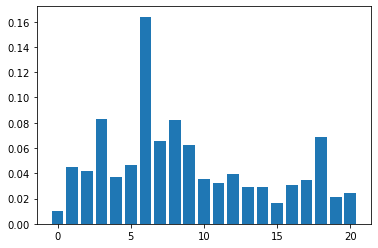

In [21]:
# get importance
importance = RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [39]:
# view the feature scores
feature_scores = pd.Series(RF.feature_importances_, index=everything).sort_values(ascending=False)
print(feature_scores)

Thickness                            0.163957
Width                                0.082794
mn                                   0.081899
cr                                   0.068839
c                                    0.065887
si                                   0.062645
Temperature after finishing mill     0.046639
Hardness_1                           0.045196
Hardness_2                           0.042114
s                                    0.039081
Temperature before finishing mill    0.037422
nb                                   0.035719
ti                                   0.035002
p                                    0.032325
n                                    0.030443
al                                   0.029483
ma                                   0.028965
mo                                   0.024431
va                                   0.020927
b                                    0.016398
furnace Number                       0.009834
dtype: float64


In [48]:
hand_picked = ['Width','Thickness',"mn","cr", "c","si"]
X = CoilData[hand_picked]
y = CoilData['constriction']

In [49]:
#UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [50]:
#Split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [52]:
#Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
#RandomForest model

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred = RF.predict(X_test)
print("RandomForest  Accuracy = " ,metrics.accuracy_score(y_test, y_pred))

RandomForest  Accuracy =  0.8178970917225951


In [59]:
# Evaluate your model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1112
           1       0.80      0.85      0.82      1123

    accuracy                           0.82      2235
   macro avg       0.82      0.82      0.82      2235
weighted avg       0.82      0.82      0.82      2235



Predicted,0,1
Actual,,
0,879,233
1,174,949


In [63]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.8177627532880196

In [66]:
# Getting the probabilities of our predictions
y_scores = RF.predict_proba(X_train)
y_scores = y_scores[:,1]

# Calculate False Positive and True Positive
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

In [67]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67,
       0.66, 0.65, 0.64, 0.62, 0.61, 0.58, 0.57, 0.54, 0.43, 0.41, 0.39,
       0.38, 0.37, 0.36, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27,
       0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16,
       0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05,
       0.04, 0.03, 0.02, 0.01, 0.  ])

In [80]:
# set threshold to 0.15

threshold = 0.3

from sklearn.preprocessing import binarize

y_pred_prob = RF.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

y_pred_class = binarize(y_pred_prob,threshold=threshold)[0]

y_pred_class = y_pred_class.astype('int')

print(f'roc_auc_score : {roc_auc_score(y_test, y_pred_class)}')

print(classification_report(y_test,y_pred_class))
confusion_matrix(y_test,y_pred_class)
pd.crosstab(y_test, y_pred_class, rownames = ['Actual'], colnames =['Predicted'])

roc_auc_score : 0.810599739264688
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1112
           1       0.75      0.93      0.83      1123

    accuracy                           0.81      2235
   macro avg       0.83      0.81      0.81      2235
weighted avg       0.83      0.81      0.81      2235



Predicted,0,1
Actual,,
0,769,343
1,79,1044
